In [2]:
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle as pk

In [58]:
path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/'

nombre = 'alferdez'

kici_oct = pd.read_csv(path_git+'Tweets_'+nombre+'_oct.csv')
clusters = pk.load(open(path_git+nombre+'_clusters_75_oct.pk', 'rb'))

frases = list(kici_oct['Tweets_sin_url'])
cluster_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}
kici_oct['cluster'] = kici_oct['Tweets_sin_url'].map(cluster_map)
kici_oct['RT'] = False

In [67]:
clus_3 = kici_oct[kici_oct['cluster'] == '3']
clus_3

,Unnamed: 0,Tweets,Fecha,urls,verified,Tweets_sin_url,cluster,RT
443,443,#SanJuan y el gobernador @sergiounac recibe co...,Tue Oct 01 09:05:27 +0000 2019,0,False,#SanJuan y el gobernador @sergiounac recibe co...,3,False
2164,2164,Entre todos construyamos el país y la provinci...,Tue Oct 01 14:34:10 +0000 2019,0,False,Entre todos construyamos el país y la provinci...,3,False
2501,2501,Felíz día a quienes forjaron nuestros cimiento...,Tue Oct 01 15:36:53 +0000 2019,0,False,Felíz día a quienes forjaron nuestros cimiento...,3,False
2507,2507,Gracias por la convocatoria y vamos a lograr t...,Tue Oct 01 15:35:53 +0000 2019,https://t.co/QspSVfoEOL,False,Gracias por la convocatoria y vamos a lograr t...,3,False
3324,3324,#Orgulloso de poder participar de este acto de...,Tue Oct 01 17:45:31 +0000 2019,0,False,#Orgulloso de poder participar de este acto de...,3,False
...,...,...,...,...,...,...,...,...
492543,492543,-Felicitaciones @alferdez \n-Gracias Damabau.\...,Wed Oct 30 00:28:07 +0000 2019,https://t.co/LXPWZTCUNH,False,-Felicitaciones @alferdez \n-Gracias Damabau.\...,3,False
492744,492744,"48h de @alferdez, @CFKArgentina y @Kicillofok ...",Wed Oct 30 00:31:57 +0000 2019,https://t.co/zBEcaG3dfz,False,"48h de @alferdez, @CFKArgentina y @Kicillofok ...",3,False
493169,493169,-Felicitaciones @alferdez \n-Gracias @mv_juare...,Wed Oct 30 00:42:36 +0000 2019,https://t.co/JqayJ0ZgSO,False,-Felicitaciones @alferdez \n-Gracias @mv_juare...,3,False
493173,493173,"-Felicitaciones @alferdez \n-Gracias Rodrigo, ...",Wed Oct 30 00:42:26 +0000 2019,https://t.co/7lERZqXEz1,False,"-Felicitaciones @alferdez \n-Gracias Rodrigo, ...",3,False


In [68]:
import json

filename = 'd:/Facultad/Tesis/Twitter/201910-kicillof.txt'
tweets_cluster = set(list(clus_3['Tweets']))

# Crea un diccionario para almacenar los tweets originales y sus retweets asociados
retweets_dict = {tweet: [] for tweet in tweets_cluster}

retweets_data = []
with open(filename, 'r', encoding='utf8') as fp:
    for i, line in enumerate(fp):
        json_data = json.loads(line)
        tweet = json_data['text']
        if tweet.startswith('RT'):
            try:
                original_tweet = json_data['retweeted_status']['full_text']
                if original_tweet in tweets_cluster:
                    retweets_dict[original_tweet].append(tweet)
                    filt = clus_3['Tweets'] == original_tweet
                    verifide = clus_3[filt]['verified'].tolist()[0]
                    retweets_data.append({
                        "Tweets": original_tweet,
                        "Fecha": json_data['created_at'],
                        "urls": 0,
                        "verified": verifide,
                        "Tweets_sin_url": original_tweet,
                        "cluster": '3',
                        "RT": True
                    })               
            except KeyError:
                pass
        

In [69]:
clus_3.drop(columns=['Unnamed: 0'], inplace=True)
list(clus_3['Tweets'])[20:100]


C:\Users\Ale\AppData\Local\Temp\ipykernel_11268\3509925959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_3.drop(columns=['Unnamed: 0'], inplace=True)


['¡Gracias @alferdez! Compartimos una gran jornada de trabajo, encuentro y diálogo durante tu visita a San Juan. Sigamos unidos y, entre todos, pondremos a la #ArgentinaDePie. 🇦🇷 https://t.co/116DQX8V85',
 '🎙️ @MicheliPablo, sec gral de la CTA Autónoma, en #HabráConsecuencias:\n\n"Frente a un Gobierno nacional y popular hay que defender los derechos de los trabajadores y @alferdez y @CFKArgentina van a tener en frente un poder importante".\n\n📻 Escuchanos en https://t.co/da14gj9zrW https://t.co/Rj3UnCJhAp',
 'Con @EstradaEmiliano visitamos la facultad de Cs Naturales de la Universidad Nacional de Salta donde fuimos recibidos por su decano Julio Nasser.\nEn la Argentina q viene las Universidades tendrán un rol preponderante, junto a @alferdez y @ElOsoLeavy vamos a poner a Salta de pie. https://t.co/BAJzIF1vtb',
 'Por cuestiones de agenda se reprograma la visita de nuestro compañero @alferdez al Chaco. \n\nQueremos una Argentina industrializada y pujante, donde sean parte los más vulnera

In [70]:
len(retweets_data)
df_RT = pd.DataFrame(retweets_data)
clus_3_completo = pd.concat([clus_3, df_RT], ignore_index=True)
#clus_3_completo

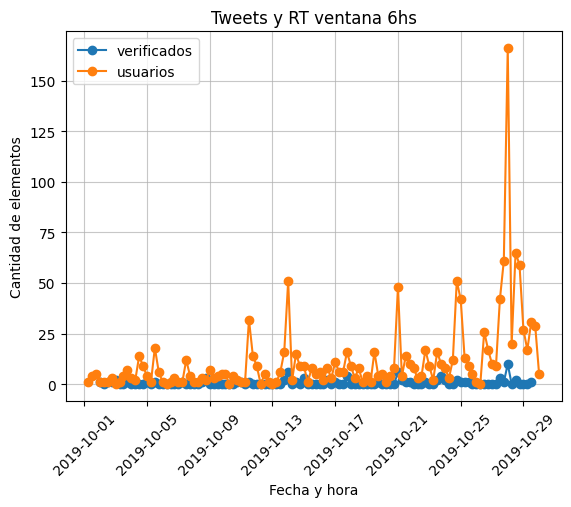

In [71]:
clus_3_completo['Fecha'] = pd.to_datetime(clus_3_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
horas = '6H'
#ventana_temporal = pd.offsets.Hour(horas)
clus_3_verifide =  clus_3_completo[clus_3_completo['verified']== True]
clus_3_user =  clus_3_completo[clus_3_completo['verified']== False]

dos_tipos =[clus_3_verifide, clus_3_user]
names = ['verificados', 'usuarios']
plt.figure()

for i, tipos in enumerate(dos_tipos):
    df_grouped = tipos.groupby(pd.Grouper(key='Fecha', freq=horas)).size().reset_index(name='count')
    plt.plot(df_grouped['Fecha'], df_grouped['count'], marker='o', linestyle='-', label = names[i])

# df_grouped = clus_3_completo.groupby(pd.Grouper(key='Fecha', freq=horas)).size().reset_index(name='count')
# plt.plot(df_grouped['Fecha'], df_grouped['count'], marker='o', linestyle='-', label = 'completo')
plt.title("Tweets y RT ventana 6hs")
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de elementos')
#plt.xlim([datetime(2019, 10, 26), datetime(2019, 10, 30)])
plt.legend()
plt.grid(alpha = 0.7)
plt.xticks(rotation=45)
plt.show()